In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("data/innos.npy", allow_pickle=True) # (y - y_hat)
np.array(data).shape

(515,)

In [2]:
inno = []
for p in data:
    inno.append(p[:3])
inno = np.array(inno).reshape(-1,3)
inno.shape

(515, 3)

In [3]:
# https://scicoding.com/4-ways-of-calculating-autocorrelation-in-python/
def plot_autocorr(data,N=100):
    # Mean
    mean = np.mean(data)

    # Variance
    var = np.var(data)

    # Normalized data
    ndata = data - mean

    acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:] 
    acorr = acorr / var / len(ndata)
    plt.plot(acorr[:N])

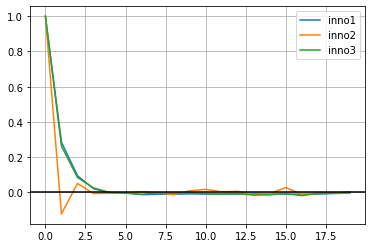

In [4]:
plot_autocorr(inno[:,0], N=20)
plot_autocorr(inno[:,1], N=20)
plot_autocorr(inno[:,2], N=20)
plt.grid()
plt.axhline(0, color='black')
plt.legend(['inno1','inno2','inno3'])
# https://www.robots.ox.ac.uk/~ian/Teaching/ TODO: read this one : ) 